In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

figdir = '../../figure/digital-signal-synthesis'

os.makedirs(figdir, exist_ok=True)

In [2]:
# accumulator bits
N = 8

# clock iterations
M = 50

# reference frequency
f_ref = 1e9

# output frequency
f_out = 1e8

# accumulator step
dphi = np.ceil(2**N * f_out / f_ref + .5)

# accumulator values over one period
phi = np.cumsum(dphi * np.ones(M)).astype(np.uint8)

# accumulator iterations
n = 2**N * np.linspace(0, 1, M)

# output signal
s = np.cos(2*np.pi*phi / 2**N)

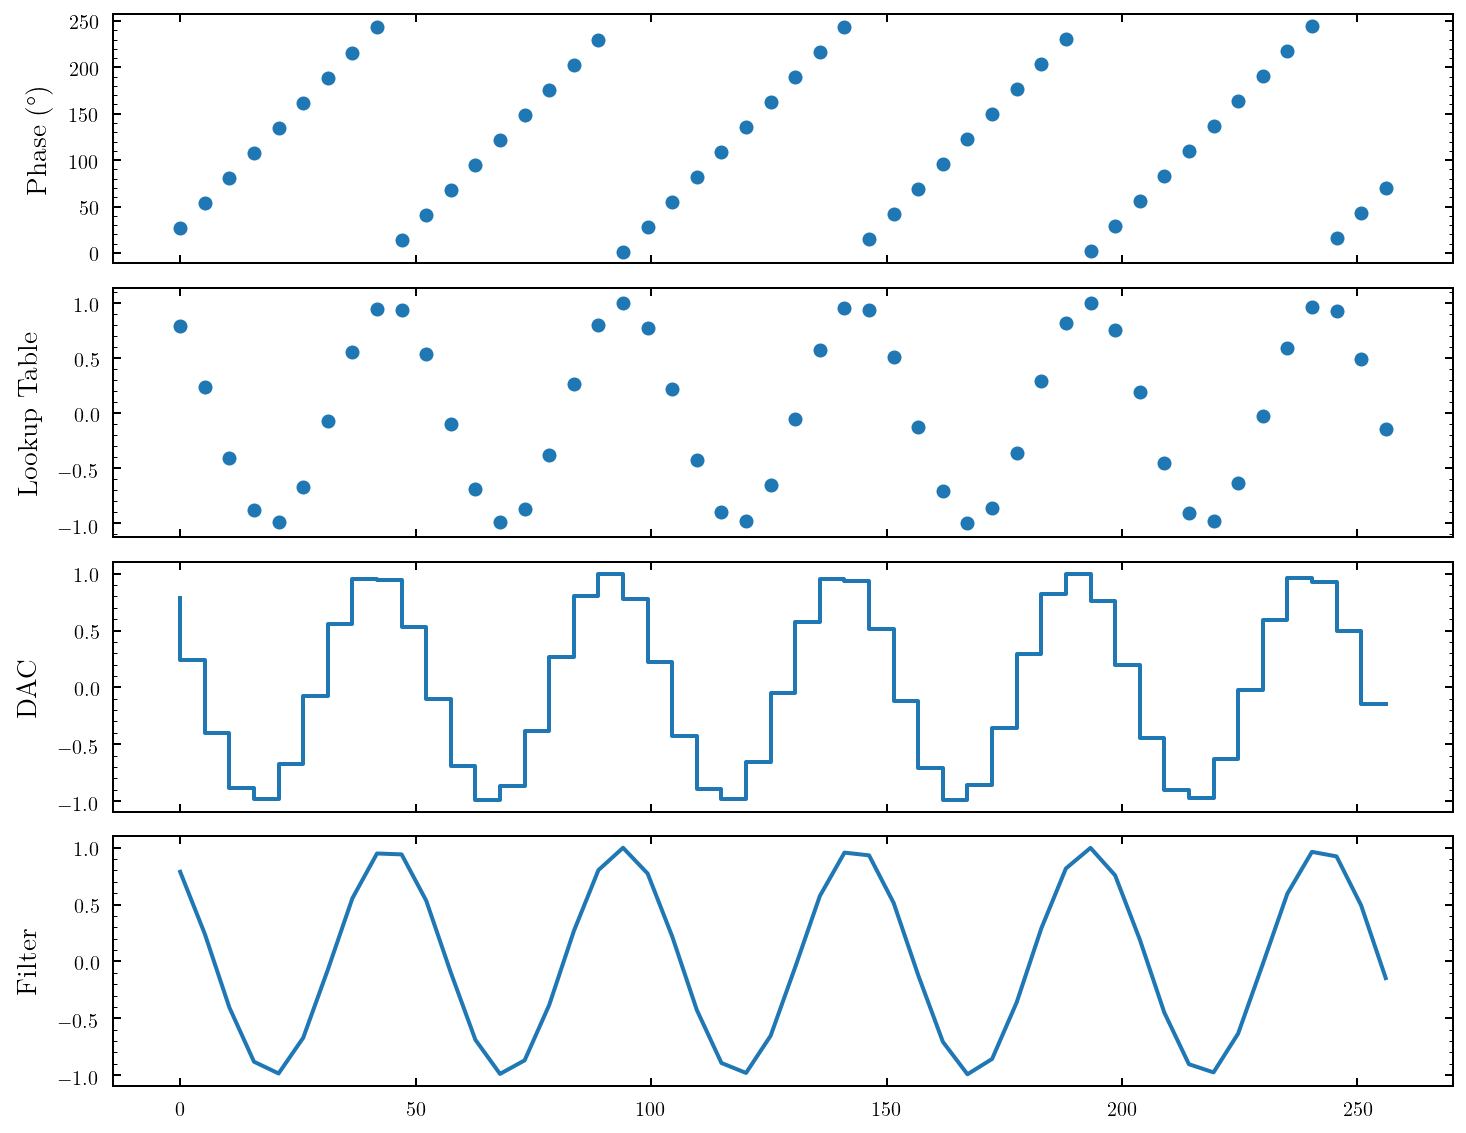

In [6]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(12, 8))

axes[0].scatter(n, phi)
axes[0].set_ylabel('Phase (\si{\degree})')

axes[1].scatter(n, s)
axes[1].set_ylabel('Lookup Table')

axes[2].step(n, s)
axes[2].set_ylabel('DAC')

axes[3].plot(n, s)
axes[3].set_ylabel('Filter')

plt.subplots_adjust(hspace=.1, top=.98, bottom=.05)
plt.savefig(os.path.join(figdir, 'simple-output.pdf'))
plt.savefig(os.path.join(figdir, 'simple-output.pgf'))
plt.show()

In [43]:
M = 8

bins = np.linspace(0, +2, 8)

t = np.linspace(0, 1)

x = np.sin(2*np.pi*t) + 1
y = x[np.digitize(x, bins, right=True)]

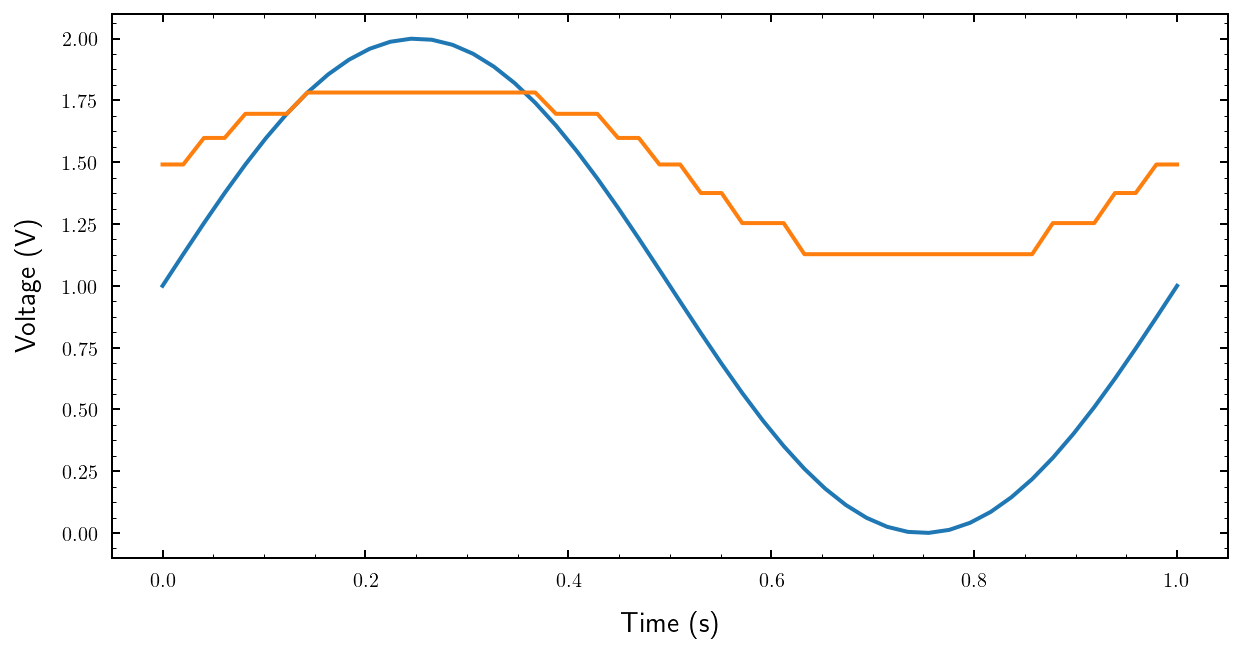

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

In [40]:
bins

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])